In [5]:
import pandas as pd
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal as random_gauss
from scipy.stats import multivariate_normal
from scipy import random, linalg
from math import pi as π
from numpy.linalg import det, inv

[[ 1.02550539  0.64459788]
 [ 0.64459788  0.55028915]]
[[ 0.87977503  0.41322587]
 [ 0.41322587  0.21583286]]
[[ 0.12001445  0.28685155]
 [ 0.28685155  0.9850168 ]]


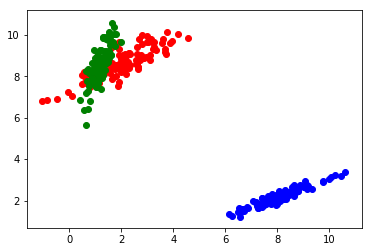

[[ 0.07105219  0.36432465]
 [ 0.36432465  1.95405184]]
[[ 0.81987948  0.19377547]
 [ 0.19377547  0.04949061]]
[[ 1.02862855  0.84733096]
 [ 0.84733096  1.12729878]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.

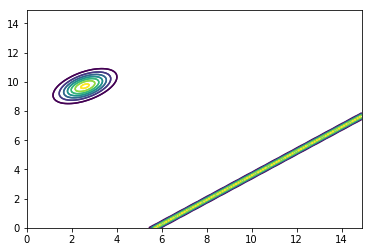

[[  0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000 

    3.33439789e-042   2.59640418e-033   2.16341585e-034   1.26543437e-039]]
singular matrix
[[ 0.51740943  0.33223207]
 [ 0.33223207  0.57966416]]
singular matrix
[[ 0.01281546  0.04982624]
 [ 0.04982624  0.76209042]]
[[  0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.

ValueError: zero-size array to reduction operation minimum which has no identity

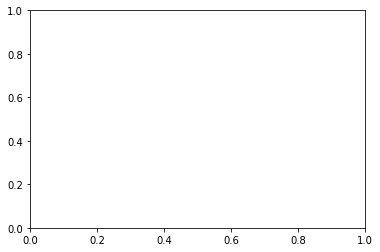

In [35]:
def generate_mean():
    return random.rand(2,) * 10

def generate_covariance():
    random_matrix = random.rand(2, 2)
    print(np.dot(random_matrix, random_matrix.transpose()))
    return np.dot(random_matrix, random_matrix.transpose())

def p(x, µ, Σ):
    n = Σ.shape[0]
    xµ = np.matrix(x-µ).transpose()
    return 1/((2*π) ** (n/2) * det(Σ)**0.5) * np.exp(-0.5 * xµ.transpose() * inv(Σ) * xµ)

x = []
y = []
distributions = []
colors = ["red", "blue", "green"]
covs = [generate_covariance() for _ in range(3)]
for (x, y), cov in zip([random.rand(2,) * 10 for _ in range(3)], covs):
    distributions.append(random_gauss((x, y), cov, 100))

samples = np.concatenate(distributions)

# plot samples
for d, c in zip(distributions, colors):
    plt.scatter(d[:,0], d[:,1], color=c)
plt.show()
    
phi = [1/3] * 3
mu = [generate_mean() for _ in range(3)]

sigma = []
for _ in range(len(phi)):
    sigma.append(generate_covariance())


weights = np.zeros((len(phi), len(samples)))
for iteration in range(10):
    print(weights)
    # e-step
    for j in range(len(phi)):
        for i in range(len(samples)):
            weights[j][i] = p(samples[i], mu[j], sigma[j])
    # m-step
    for j in range(len(phi)):
        phi[j] = np.average(weights[j])
        for w, sample in zip(weights[j], samples):
            mu[j] += w * sample
        mu[j] = mu[j]/sum(weights[j])
        s = np.zeros((2, 2))
        for i in range(len(samples)):
            x = samples[i]
            s += weights[j][i] * (np.mat(x - mu[j]).T * np.mat(x - mu[j]))
        s = s / sum(weights[j])
        sigma[j] = s

    for j in range(len(phi)):
        x, y = np.mgrid[0:15:0.1, 0:15:0.1]
        pos = np.dstack((x, y))
        try:
            rv = multivariate_normal(mu[j], sigma[j])
        except np.linalg.LinAlgError as e:
            print(e)
            mu[j] = generate_mean()
            sigma[j] = generate_covariance()
            
            
        if iteration % 2 == 0: plt.contour(x, y, rv.pdf(pos))
    plt.show()
    